In [140]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#I am learning practicing from https://www.youtube.com/watch?v=iqQgED9vV7k&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=7


In [141]:
(X_train, Y_train) , (X_test, Y_test) = keras.datasets.mnist.load_data()


In [142]:
len(X_train)

60000

In [143]:
len(X_test)

10000

In [144]:
X_train[0].shape

(28, 28)

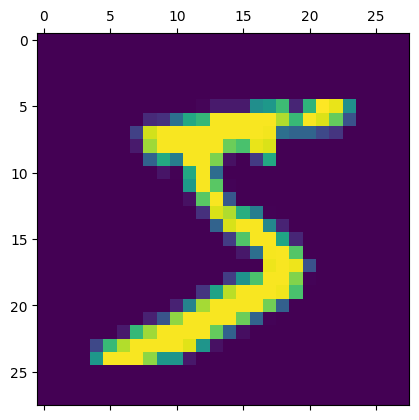

In [145]:
#showing the image
plt.matshow(X_train[0])

In [146]:
Y_train[0]
Y_train[:5]


array([5, 0, 4, 1, 9], dtype=uint8)

In [147]:
X_train.shape

(60000, 28, 28)

In [148]:
#need to transform the value to o to 1 range , max value is 255
# just doing this accuracy increast to from 0.8 to 0.9
# scaling is a technique that improve the accuracy
X_train = X_train / 255
X_test = X_test / 255

In [149]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [150]:
X_test_flattened.shape

(10000, 784)

In [151]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [152]:
model = keras.Sequential([
#10 is the output neuron
  keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4647 - accuracy: 0.8785
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9151
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9205
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9256
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2616 - accuracy: 0.9276
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2583 - accuracy: 0.9285
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2554 - accuracy: 0.9287
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2530 - accuracy: 0.9297
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.25

In [153]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2641 - accuracy: 0.9255


[0.26413610577583313, 0.9254999756813049]

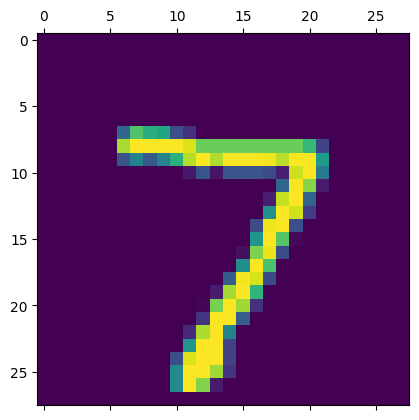

In [154]:
plt.matshow(X_test[0])

In [155]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [156]:
y_predicted[0]

array([4.1376776e-03, 1.2682938e-08, 1.8275024e-02, 9.6190119e-01,
       1.5692211e-03, 1.7175855e-01, 3.5177575e-08, 9.9981254e-01,
       6.1612837e-02, 6.3931304e-01], dtype=float32)

In [157]:
np.argmax(y_predicted[0])

7

In [158]:
y_predicted_labels  = [np.argmax(i) for i in y_predicted]

In [159]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [160]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [161]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    2,    0,    8,    7,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   5,    8,  929,   15,    9,    6,   12,   12,   32,    4],
       [   4,    0,   17,  909,    1,   36,    2,   12,   20,    9],
       [   1,    1,    3,    2,  921,    0,   11,    5,   10,   28],
       [   7,    2,    3,   21,   10,  802,   11,    7,   25,    4],
       [  11,    3,    9,    1,    7,   17,  907,    1,    2,    0],
       [   1,    6,   22,    4,    8,    1,    0,  955,    2,   29],
       [   8,    9,    7,   22,    9,   42,    8,   12,  849,    8],
       [  11,    7,    1,    9,   30,    8,    0,   30,    4,  909]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'truth')

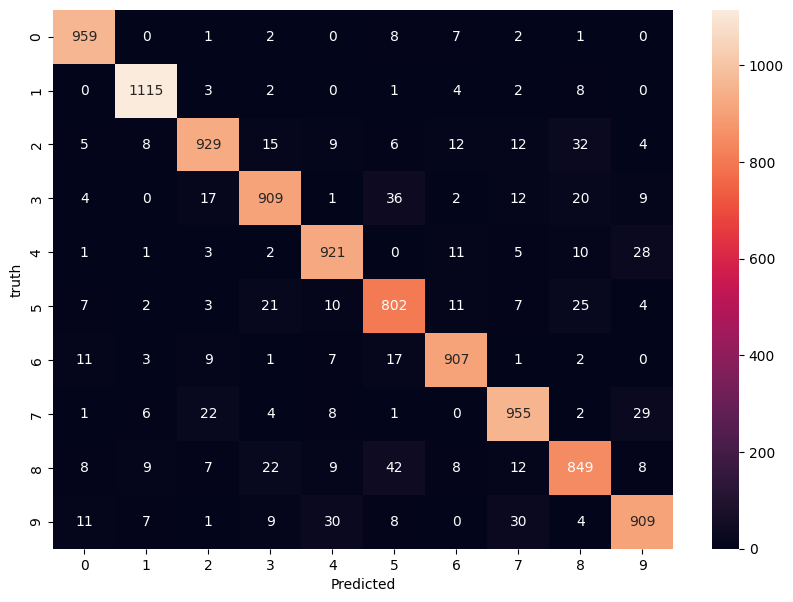

In [162]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("truth")


In [164]:
# now hidden layer added

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(50, activation='relu'),  # Hidden layer
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons for 10 classes
])


model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2642 - accuracy: 0.9234
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1127 - accuracy: 0.9657
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0778 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0604 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0478 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0383 - accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0327 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0296 - accuracy: 0.9904
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0234 - accuracy: 0.9922
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.02

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'truth')

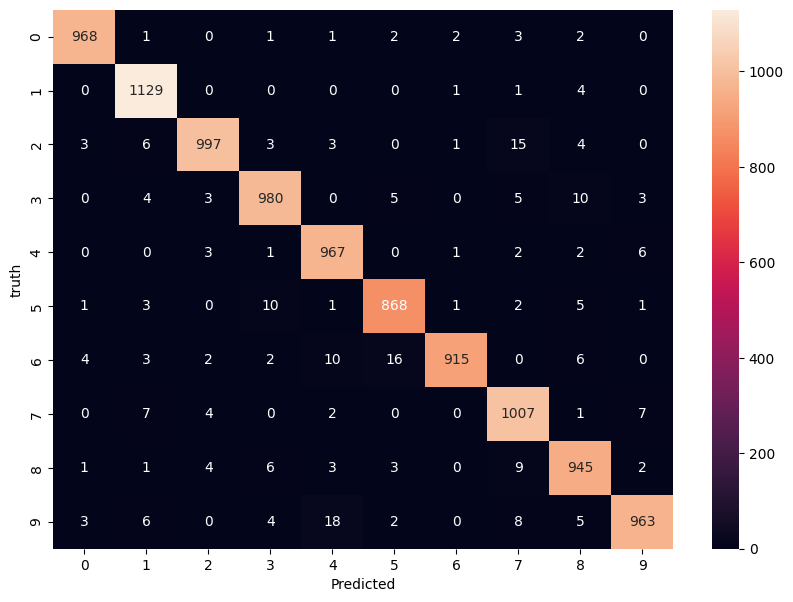

In [165]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels  = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("truth")
